## Simple Linear Regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df=pd.read_excel('weight_height.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


TypeError: 'function' object is not subscriptable

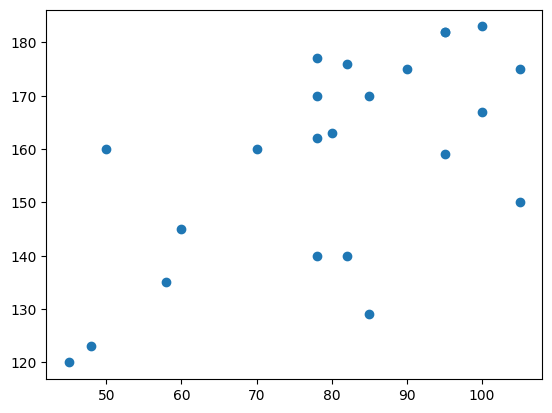

In [17]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel['Weight']
plt.ylabel['Height']

In [18]:
## Dvide our datset into independent and dependent feature
X=df[['Weight']]## independent feature
y=df['Height']# dependent feature

In [19]:
X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [20]:
## Train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
X.shape

(23, 1)

In [22]:
X_train.shape

(18, 1)

In [23]:
## Standardize the Dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

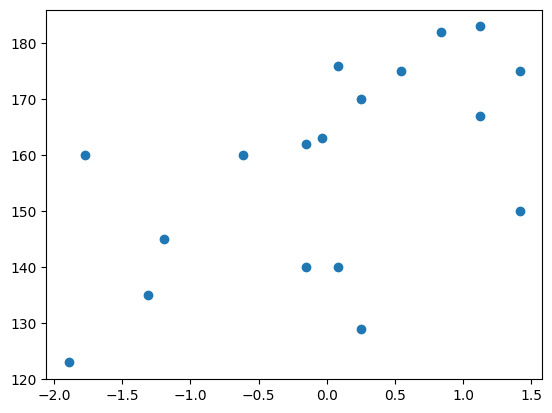

In [26]:
plt.scatter(X_train,y_train)

In [27]:
## TRain our model Simple Linear regression model
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
print("The slope of coefficient of weight",regression.coef_)
print("Intercept:",regression.intercept_)

The slope of coefficient of weight [10.28544582]
Intercept: 157.5


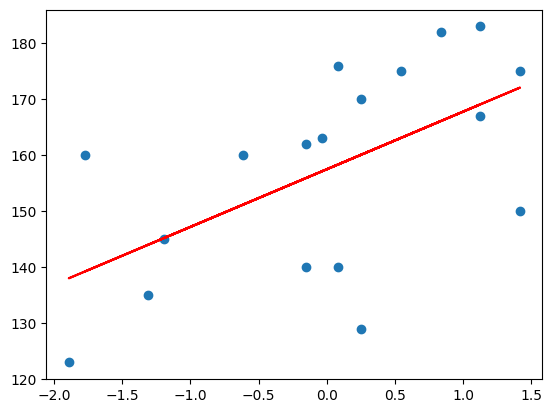

In [35]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

## Prediction of train data
1. Predicit height output=intercept+coef_(weight)

2. Y_pred_train=65.4346+1.26(X_train)

### Predicit the test data
1. predicit height output=intercept+coef_(weights)
2.Y_pred_test=65.4346+1.26(X_test)

In [37]:
y_pred_test=regression.predict(X_test)
y_pred_test,y_test

(array([155.94108838, 155.94108838, 136.23909901, 166.09059806,
        166.09059806]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

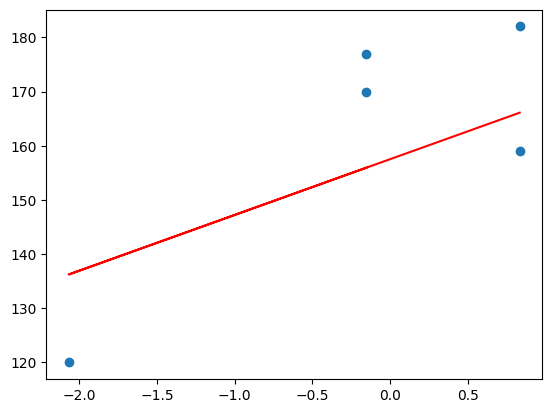

In [38]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')

In [40]:
## Perfromace Metrics
## MSE,MAE,RMSE
##R square and adjusted r square
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [41]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

241.64494839627474
14.871384448996997
15.544933206555593


In [42]:
score=r2_score(y_test,y_pred_test)
score

0.5090911986098758

In [43]:
regression

LinearRegression()

In [45]:
## New Data points

sclae_weight=scaler.transform([[80]])
sclae_weight

c:\Users\91817\Desktop\Python AI&ML\venve\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.03547261]])

In [49]:
print("The Height Prediction of weight is:",regression.predict([sclae_weight[0]]))

The Height Prediction of weight is: [157.13514834]


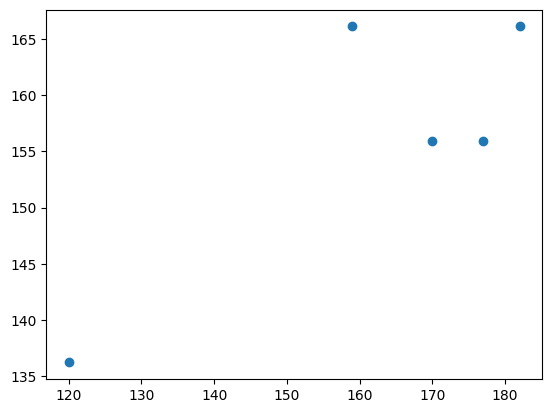

In [50]:
## Assumptions
## Plot a sactter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [51]:
## Residuals
residual=y_test-y_pred_test
residual

15    21.058912
9     14.058912
0    -16.239099
8     15.909402
17    -7.090598
Name: Height, dtype: float64

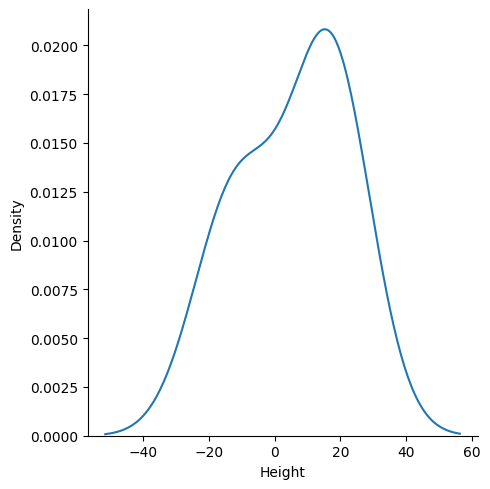

In [52]:
## Plot the resiudals
import seaborn as sns
sns.displot(residual,kind='kde')